# Laboratory #02 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

### **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [96]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![black_and_white_patches.png](https://drive.google.com/uc?export=view&id=1Iuf870gS6DuFzMtnXs53DLuiXy0oARaw)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


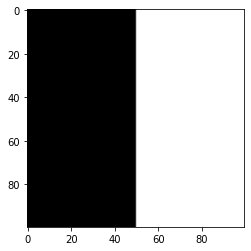

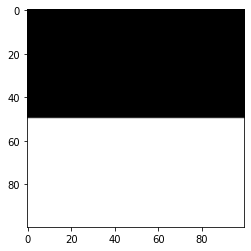

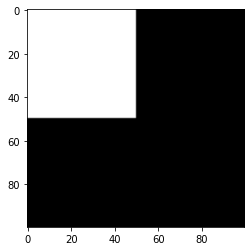

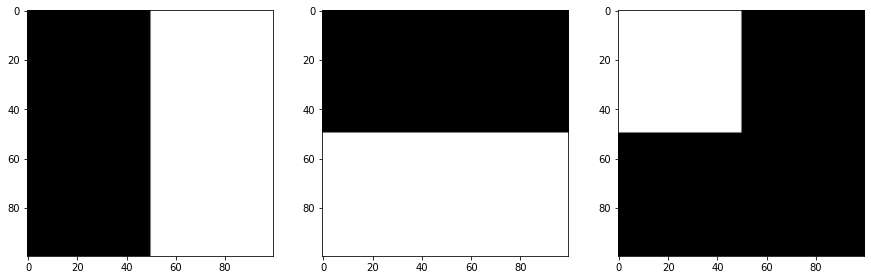

In [97]:
# Image1
img1 = np.zeros([100,100],dtype=np.uint8)
img1[: , 50:] = 255
plt.show()
plt.imshow(img1, cmap = 'gray')

# Image2
img2 = np.rot90(img1.copy(), -1)
plt.show()
plt.imshow(img2, cmap = 'gray')

# Image3
img3 = np.rot90(img2.copy(), -1)
img3[50:, 0:50] = 0
plt.show()
plt.imshow(img3, cmap = 'gray')

# Subplot
f, axarr = plt.subplots(1,3, figsize = (15,15))
for id, image in zip((0, 1, 2), (img1, img2, img3)):
  axarr[id].imshow(image, cmap = 'gray')

*   Use the above three images to create the following image

![color_patches.png](https://drive.google.com/uc?export=view&id=1UxmFHToC4TUjgtB7UQMbB3DM3RIZlgBZ)

*Hint: Remember channels and color spaces*

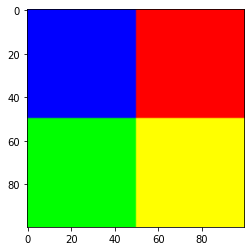

In [98]:
# Stack the previous images to get the final result 3-Dimensional matrix
# The stack is done according to the position of the white pixels and the
# RGB configuration
imgColor = np.stack((img1, img2, img3), axis=-1, out=None)
plt.imshow(imgColor)

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![sillas.jpg](https://drive.google.com/uc?export=view&id=1Ged9FdDWIcipbNxNatGgCZyRdQvcGtoG)

*   Extract individual channels and plot them using matplotlib subplot.



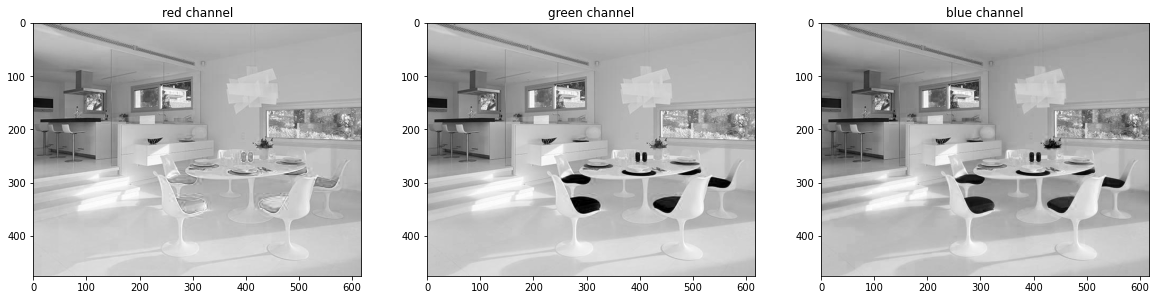

In [99]:
test_image = io.imread('https://drive.google.com/uc?export=view&id=1Ged9FdDWIcipbNxNatGgCZyRdQvcGtoG')

# Subplot
f, axarr = plt.subplots(1,3, figsize = (20,20))
for id, cl in zip((0, 1, 2), ("red", "green", "blue")):
  axarr[id].imshow(test_image[:,:,id], cmap = 'gray')
  axarr[id].set_title(cl + " channel")

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

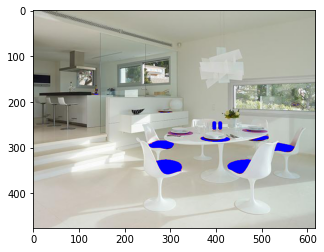

In [100]:
# Creating a mask to identify the pixels with a predominant red color
mask = (test_image[..., 0] > 100) & (test_image[..., 1] < 90)  & (test_image[..., 2] < 90)
# Changing the RGB configuration of the identified pixels
test_image[mask] = [0, 0, 255]
plt.imshow(test_image, cmap = 'gray')

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![model_and_coat.png](https://drive.google.com/uc?export=view&id=1DOieJOrfwe34z0-3EEBVyX1Ac45sb5SN)


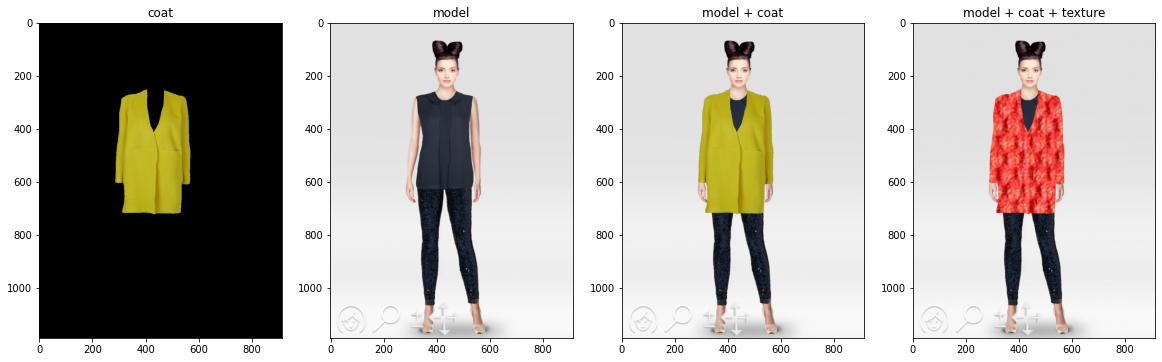

In [101]:
from skimage.transform import rescale
from skimage import color

model_image = io.imread('model.png')
coat_image = io.imread('coat.png')
texture_image = io.imread('texture2.png')

### Model + coat
# Filtering the yellow color pixels in the model image (Combination of red and green)
coat_mask = ((coat_image[..., 0] > 0) & (coat_image[..., 1] > 0))
# Changing the identified pixels with the mask
model_coat_image = model_image.copy()
model_coat_image[coat_mask] = coat_image[coat_mask]

### Model + coat + texture
# Resclaing the texture image into the model image dimensions
texture_image_rescaled = rescale(texture_image, (model_image.shape[0]/texture_image.shape[0], model_image.shape[1]/texture_image.shape[1], 1), anti_aliasing = False)
# Removing the alpha channel from the model image, to make it compatible with texture image
model_coat_texture_image = color.rgba2rgb(model_coat_image)
# Changing the identified pixels with the mask for the new texture
model_coat_texture_image[coat_mask] = texture_image_rescaled[coat_mask]

# Subplot
f, axarr = plt.subplots(1,4, figsize = (20,15))
for id, image, name in zip((0, 1, 2, 3), (coat_image, model_image, model_coat_image, model_coat_texture_image), 
                          ("coat", "model", "model + coat", "model + coat + texture")):
  axarr[id].imshow(image)
  axarr[id].set_title(name)

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




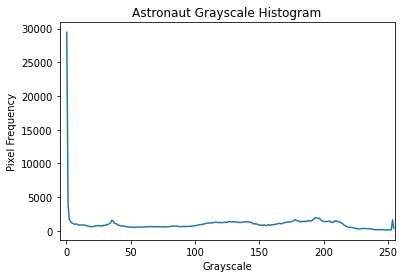

In [102]:
from skimage.color import rgb2gray

# Load image and convert to grayscale
astronaut = data.astronaut()
gray_astronaut = rgb2gray(astronaut)

# Creat Histogram
hist, hist_centers = exposure.histogram(gray_astronaut*255)

# Plot histogram
plt.figure()
plt.title("Astronaut Grayscale Histogram")
plt.xlabel("Grayscale")
plt.ylabel("Pixel Frequency")
# We choose -5 as an initial value for better visualization of the initial point in x=0
plt.xlim([-5, 255])
plt.plot(hist_centers, hist)

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

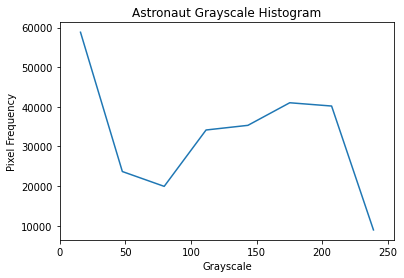

In [103]:
# Creat Histogram
hist, hist_centers = exposure.histogram(gray_astronaut*255, nbins=8)

# Plot histogram
plt.figure()
plt.title("Astronaut Grayscale Histogram")
plt.xlabel("Grayscale")
plt.ylabel("Pixel Frequency")
plt.xlim([0, 255])
plt.plot(hist_centers, hist)



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*   The bin count allows the user to define the detail of the data distribution in the histogram since the method counts the occurrences of each element. Therefore, our inference from the data changes accordingly to the value chosen, because the information provided by the histogram might not be enough (lack of bins) or too rough to understand (excess of bins).
The quantity of bins needs to vary mainly accordingly to the size of the data we need to visualize. For example, utilising 8 bins to represent 256 data points, means only 3% of the data (8 points) is faithfully described. On the other hand, with 256 bins, even though we obtain the full illustration of the data (100%), it is difficult to visually achieve conclusions and distinguish valid points from noise. This way, it is important to find a commitment between detail and visual comprehension, in which some methods are useful such as Sturge’s or Freedman-Diaconis's rules.
Additionally, the y-scale on the graph also plays a role in the bin definition, because If we don't get extreme vertical variations, we are able to choose higher values for the bin, since the histogram will be more stretched vertically, allowing a more suitable resolution for conclusions. In our example, the y-value of the datapoint x=0 is substantially bigger than the majority of the remaining points, resulting in a bad scale for the rest of the data. In general, it is desirable that for similar intensities the number of bins is equal to the range of points.

*   When the number of bins is too low the information is not represented in detail, leading to a lack of knowledge and, consequently, it's harder to understand patterns in the data. On the opposite, when the quantity is too high, the data is extremely detailed and, therefore, rough, leading to misunderstandings between valid points and noise.


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  


(-5.0, 255.0)

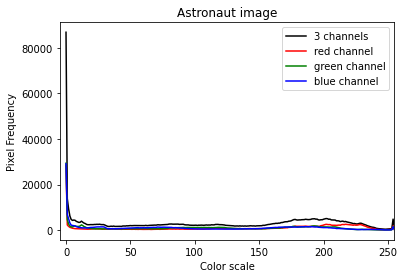

In [104]:
# Creating a plot
plt.figure()

for image, cl, channel in zip((astronaut, astronaut[:, :, 0], astronaut[:, :, 1], astronaut[:, :, 2]), ("black", "red", "green", "blue"),
                              ("3 channels", "red channel", "green channel", "blue channel")):

  # Creat the histogram
  hist, hist_centers = exposure.histogram(image)

  # Plot into subplots
  plt.plot(hist_centers, hist, color=cl, label = channel)

plt.legend(loc='upper right')
plt.title("Astronaut image")
plt.xlabel("Color scale")
plt.ylabel("Pixel Frequency")
# We choose -5 as an initial value for better visualization of the initial point in x=0
plt.xlim([-5, 255])

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  


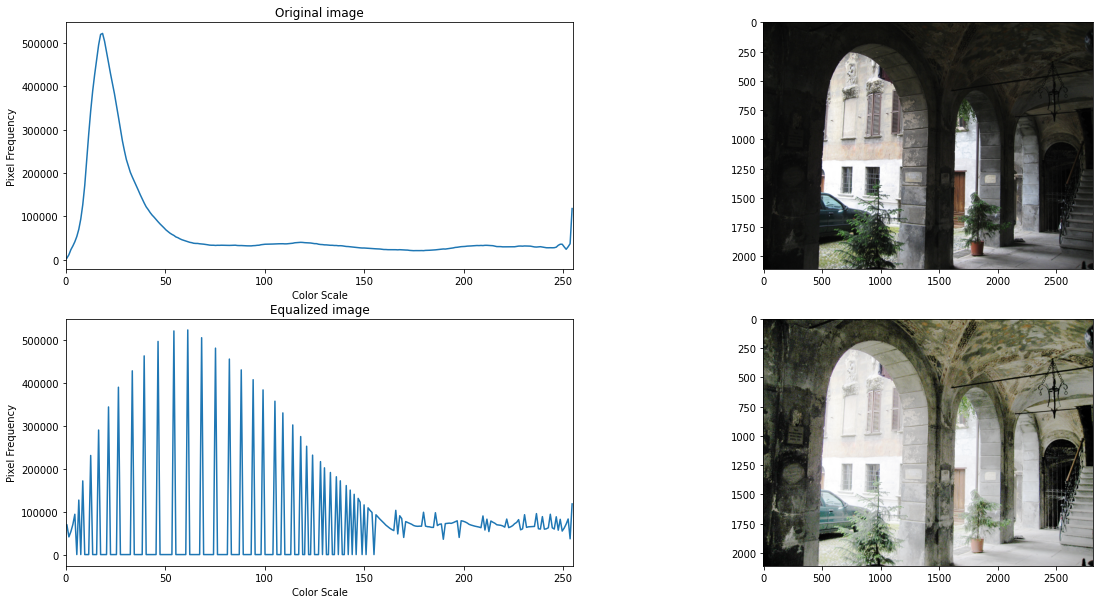

In [105]:
from skimage.exposure import equalize_hist

aquatermi_lowcontrast = io.imread('aquatermi_lowcontrast.jpg')
equalized_aquatermi_lowcontrast= equalize_hist(aquatermi_lowcontrast, nbins=256, mask=None)

# Calculating the histograms
aquatermi_histogram, hist_centers = exposure.histogram(aquatermi_lowcontrast)
equalized_histogram, hist_centers = exposure.histogram(equalized_aquatermi_lowcontrast * 255)

# Creating a subplot
f, axarr = plt.subplots(2,2, figsize = (20,10))

# Subplot
for id, image, hist, name in zip((0, 1), (aquatermi_lowcontrast, equalized_aquatermi_lowcontrast), (aquatermi_histogram, equalized_histogram),
                                ("Original image", "Equalized image")):
  axarr[id,0].plot(hist_centers, hist)
  axarr[id,0].set_title(name)
  axarr[id,0].set_xlabel("Color Scale")
  axarr[id,0].set_ylabel("Pixel Frequency")
  axarr[id,0].set_xlim([0, 255])
  axarr[id,1].imshow(image)


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*   The linear contrast stretch is a linear transformation to improve the contrast of an image by expanding uniformly the intensity of the total pixel's values, in order to fit the range defined. Analysing the following exercise, it's understandable that the histogram was uniformly stretched along the x-axis independently of the frequency of the intensity values. The apparent shift in the histogram is a consequence of this manipulation when the initial histogram is not totally uniform and centred with the middle of the range (the most common case).
On the other hand, the histogram equalisation uses a monotonic and a non-linear mapping to increase the image contrast by extending the most frequent pixel's values in the intensity range defined, through the flattening of the CDF (cumulative density function) into a linear function. That's the reason why in the previous exercise we register, mainly, a stretch on the curve bell of the function (the range with the most common intensity values).

    Therefore, the difference is, essentially, related to the pixels used (the entire set of pixels in linear contrast stretch and the most frequent intensity pixels in histogram equalisation).

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



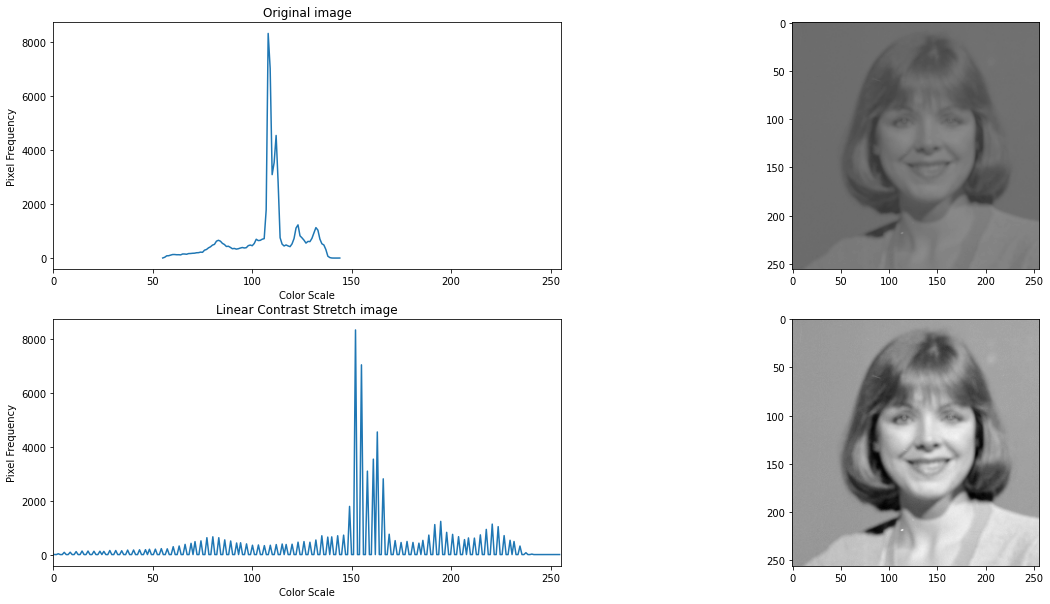

In [106]:
from matplotlib.colors import NoNorm

lady = io.imread('lady.gif')

def linearContrastStretch (grayscale_image, bin):
  return (grayscale_image - np.min(grayscale_image)) * ((bin-0) / (grayscale_image.max()*bin - grayscale_image.min()*bin)) - 0

# Select the number of bins
select_bins = 255

# Get the linear contrast strech on the lady image
linear_constrast_lady = linearContrastStretch (lady, select_bins)

# Calculating the histograms
lady_histogram, lady_hist_centers = exposure.histogram(lady)
linear_constrast_lady_histogram, linear_constrast_hist_centers = exposure.histogram(linear_constrast_lady*select_bins)

# Creating a subplot
f, axarr = plt.subplots(2,2, figsize = (20,10))

# Subplot
for id, image, hist, hist_centers, name in zip((0, 1), (lady, linear_constrast_lady), (lady_histogram, linear_constrast_lady_histogram),
                                               (lady_hist_centers, linear_constrast_hist_centers), ("Original image", "Linear Contrast Stretch image")):
  axarr[id,0].plot(hist_centers, hist)
  axarr[id,0].set_title(name)
  axarr[id,0].set_xlabel("Color Scale")
  axarr[id,0].set_ylabel("Pixel Frequency")
  axarr[id,0].set_xlim([0, 255])
  # We ignore the normalization in order to have the image in the natural form, without the improvement of the contrast.
  # This way the effect of the linear contast stretch is more visible.
  # The histogram keeps corresponding to the image, because normalization doesn't distorce the graylevels intensities 
  # too significantly.
  axarr[id,1].imshow(image, cmap = 'gray', norm = NoNorm())

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


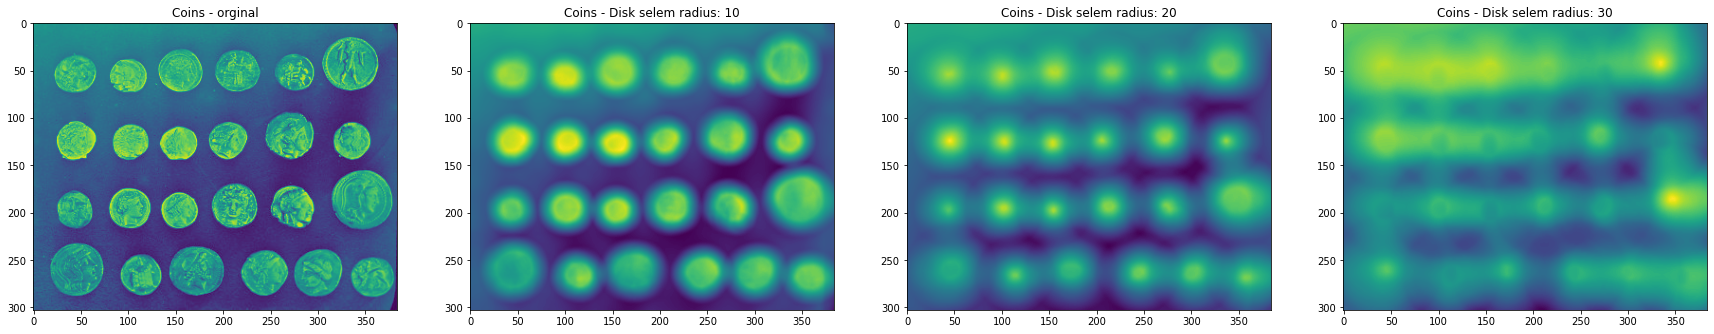

In [107]:
from skimage.morphology import disk
from skimage.filters.rank import mean
from skimage.color import rgb2gray

# Load image and convert to grayscale
coins = rgb2gray(data.coins())

# Defining the selem radius
selem_radius = 20

# Subplot
f, axarr = plt.subplots(1,4, figsize = (30,30))
axarr[0].imshow(coins)
axarr[0].set_title("Coins - orginal")
for id, radius in zip((1, 2, 3), (selem_radius-10, selem_radius, selem_radius+10)):
  coins_mean_filter = mean(coins, disk(radius))
  axarr[id].imshow(coins_mean_filter)
  axarr[id].set_title("Coins - Disk selem radius: " + str(int(radius)))

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

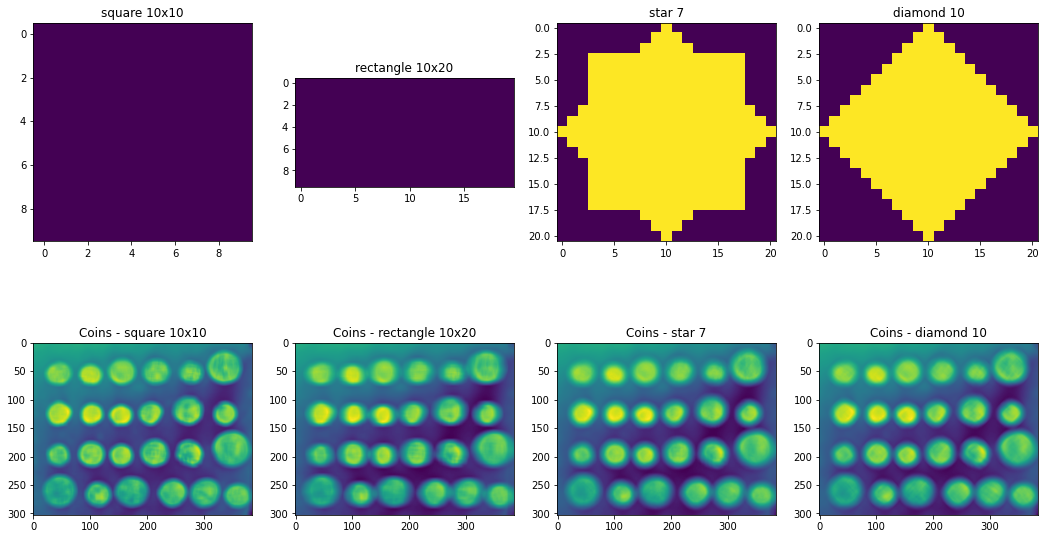

In [108]:
from skimage.morphology import square, rectangle, star, diamond

# Subplot
f, axarr = plt.subplots(2,4, figsize = (18,10))
for id, selem, morphology in zip((0, 1, 2, 3), (square(10), rectangle(10, 20), star(7), diamond(10)),
                                ("square 10x10", "rectangle 10x20", "star 7", "diamond 10")):
  coins_mean_filter = mean(coins, selem)
  axarr[0][id].imshow(selem)
  axarr[0][id].set_title(morphology)

  axarr[1][id].imshow(coins_mean_filter)
  axarr[1][id].set_title("Coins - " + morphology)

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*   As the low-pass filter (smoothing) is shifting through each pixel of the image to remove high spatial frequency noise, it is calculating the mean intensity of the pixels in the neighbourhood, in order to attribute this value to the pixel being filtered. So, the bigger the radius of the filter, the more neighbour pixels are considered for the average and, consequentially, we get more blurred images, meaning that the intensity variation between pixels decreases.


*   What is the observed behaviour with difference in the structuring element?



**Solution**


*   The change of the structuring element interferes, predominantly, with which elements in the neighbourhood are considered according to their relative spatial position to the pixel being filtered.
Through the analyses of the results obtained by different shapes, we infer that the disk and square filters reproduce more uniformly smoothed images since the area considered along both axes is equal. On the other hand, when a rectangle is chosen, the filtering will be more affected by the pixels along the axis corresponding to its length (the x-axis in the previous exercise). This way, the image obtained presents less intensity variation along the x-axis, creating a visual sensation of an image in horizontal movement. Finally, the star and diamond shapes give rise to close results, because of their shapes, however, the way pixels are considered is not useful for the mean filtering, since the outcomes are not as uniform as the previous structures.

    According to the analysis, the disk and square structures are more useful to implement low-pass filtering.







*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*   In the mean filter, the pixel is replaced by the mean of the surrounding pixels within the shape, which all have the same weight. When a gaussian filter is used, the closer the pixel, the bigger the weight. This is obtained by applying the bell-curve characteristic of the gaussian function, over the pixel we want to filter.

*   The mean filter is optimal to remove random noise in the image since the filtering process is uniform (all the pixels within the shape have the same weight). However, this method has a low ability to separate the different frequencies from each other. Consequentially, this type of filter passes some high frequencies and stops a few low frequencies. The Gaussian filter by attributing weights according to the spatial position of the pixel, performs better in the frequency domain, being more useful when we pretend to separate frequencies in an image.

    In terms of performance, the mean filter is faster, because it only calculates the mean of the pixels, while the gaussian filter uses convolution.


---

## **End of P2: Image operators and filters**

Deadline for P2 submission in CampusVirtual is: **Thursday, the 6th of October, 2022**
